In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from Algorithm.utils import rename_columns, transfer_X, map_output, load_model
from sklearn.metrics import log_loss

import sys

sys.path.append("../Algorithm")

In [8]:
W = pd.read_pickle('../Algorithm/weights.pkl')
X = pd.read_pickle('../Data.nosync+/X_t_test.pkl')
y = pd.read_pickle('../Data.nosync+/y_t_test.pkl')
X_source = pd.read_parquet('turbofan_features.parquet', engine='pyarrow')

model = load_model()

In [9]:
X = rename_columns(X_source, X)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_hat = transfer_X(X, W)
output_translated = map_output(model.predict_proba(X_hat))

/Users/felixschreyer/Documents/Dokumente/Abschlussarbeit/BAR/Algorithm/utils.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_B[column_name] = 0
/Users/felixschreyer/Documents/Dokumente/Abschlussarbeit/BAR/Algorithm/utils.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_B[column_name] = 0
/Users/felixschreyer/Documents/Dokumente/Abschlussarbeit/BAR/Algorithm/utils.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

In [10]:
predicted_classes = np.argmax(output_translated, axis=1)+1
output_translated

array([[0.37684272, 0.14736135, 0.47579592],
       [0.30309348, 0.15672495, 0.54018157],
       [0.27126564, 0.13204055, 0.59669381],
       [0.24448965, 0.14208409, 0.61342626]])

In [11]:
y

id
(1, 2023-01-01 08:59:10.460000)    1
(1, 2023-01-01 09:14:10.460000)    1
(1, 2023-01-01 09:29:10.460000)    2
(1, 2023-01-01 09:44:55.460000)    3
Name: RUL_rolled_class, dtype: int64

In [12]:
predicted_classes

array([3, 3, 3, 3])

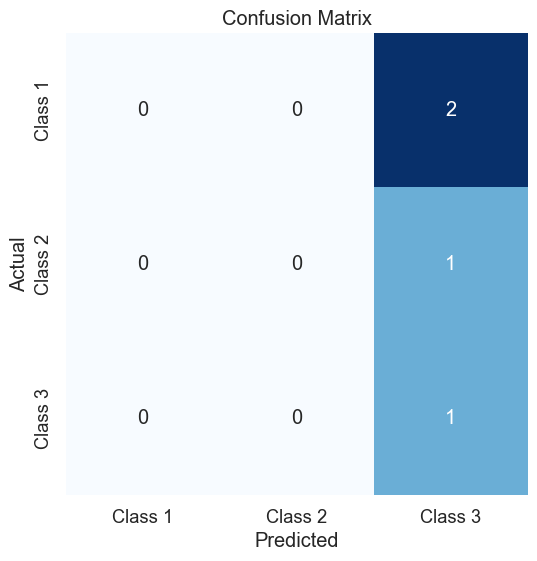

In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true=y, y_pred=predicted_classes)
# Define class labels (change to your own class labels)
class_labels = ["Class 1", "Class 2", "Class 3"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)


In [28]:
class_weights

array([1.16666667, 3.5       , 0.53846154])